In [3]:
import matplotlib.pyplot as plt
import numpy as np
from vrnn_loss import plot_losses_VRNN

# Outline of training

1. Train Beta = 1 for 150 epochs (constant LR = 1e-4) 
2. Train Beta = 0 for 300 epochs 
3. Train Beta = 0.1 for ... 
4. Train Beta = 0.5 for ... 
5. Train Beta = 0.4 for ... 

### Deterministic Model

Training steps 1 and 2

In [53]:
loss_path_1 = '../../logs/VRNN/v1/important/VRNN_v1_beta=1.0_150.log'
loss_path_2 = '../../logs/VRNN/v1/important/VRNN_v1_beta=0.0_step=1000000_300.log'

loss_path_3a = '../../logs/VRNN/v1/important/VRNN_v1_beta=0.1_step=1000000_100.log'
loss_path_3b = '../../logs/VRNN/v1/important/VRNN_v1_beta=0.1_step=1000000_250.log'

loss_path4 = '../../logs/VRNN/v1/important/VRNN_v1_beta=0.5_step=1000000_500.log'
loss_path5 = '../../logs/VRNN/v1/important/VRNN_v1_beta=0.4_step=1000000_150.log'



In [13]:
def plot_losses_VRNN(log_path):
    """
    Log files for other models may be formatted differently
    """

    losses = []

    with open(log_path) as f:
        # ignore first line
        for idx, line in enumerate(f):
            if "Namespace" in line or "Starting" in line or "Train" in line: 
                pass
            elif "Finished" in line or "Saved" in line:
                pass
            else:
                x = line.split(":")[-1]
                x = x.strip("\n")
                losses.append(x)

    train_loss = []
    kld = []
    reconstruction_loss = []

    for line in losses:
        line = line.split(",")
        train_loss.append(float(line[0]))
        kld.append(float(line[1]))
        reconstruction_loss.append(float(line[2]))

    return train_loss, kld, reconstruction_loss

In [18]:
train_loss1, kld1, mse1 = plot_losses_VRNN(loss_path_1)
print(len(train_loss1), len(kld1), len(mse1))

150 150 150


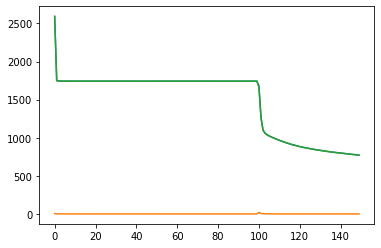

In [22]:
plt.plot(train_loss1)
plt.plot(kld1)
plt.plot(mse1)
plt.show()

In [24]:
train_loss2, kld2, mse2 = plot_losses_VRNN(loss_path_2)
print(len(train_loss2), len(kld2), len(mse2))

300 300 300


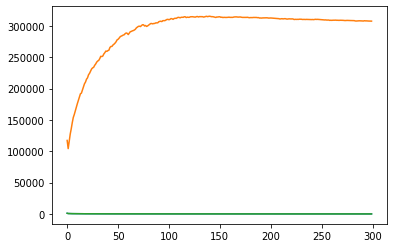

In [25]:
plt.plot(train_loss2)
plt.plot(kld2)
plt.plot(mse2)
plt.show()

### Stochastic Model 

Steps 3, 4, 5

In [52]:
# Step 3
train_loss3a, kld3a, mse3a = plot_losses_VRNN(loss_path_3a)
train_loss3b, kld3b, mse3b = plot_losses_VRNN(loss_path_3b)

train_loss3 = train_loss3a + train_loss3b
kld3 = kld3a + kld3b
mse3 = mse3a + mse3b

print(len(train_loss3), len(kld3), len(mse3))

350 350 350


In [89]:
# Step 4
train_loss4, kld4, mse4 = plot_losses_VRNN(loss_path4)

train_loss4 = train_loss4[:400]
kld4 = kld4[:400]
mse4 = mse4[:400]

print(len(train_loss4), len(kld4), len(mse4))

# Step 5
train_loss5, kld5, mse5 = plot_losses_VRNN(loss_path5)
print(len(train_loss5), len(kld5), len(mse5))

400 400 400
150 150 150


### Combine all lists together

In [90]:
train_loss = train_loss1 + train_loss2 + train_loss3 + train_loss4 + train_loss5
kld = kld1 + kld2 + kld3 + kld4 + kld5
mse = mse1 + mse2 + mse3 + mse4 + mse5

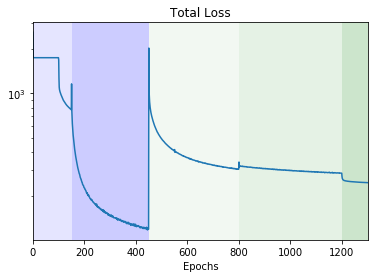

In [94]:
plt.plot(train_loss)
plt.yscale('log')
plt.xlabel('Epochs')
plt.title('Total Loss')

# Settings 
plt.xlim(xmin=0, xmax = 1300)
plt.axvspan(0, 150, facecolor='b', alpha=0.1)
plt.axvspan(151, 450, facecolor='b', alpha=0.2)
plt.axvspan(451, 800, facecolor='g', alpha=0.05)
plt.axvspan(800, 1200, facecolor='g', alpha=0.1)
plt.axvspan(1200, 1300, facecolor='g', alpha=0.2)

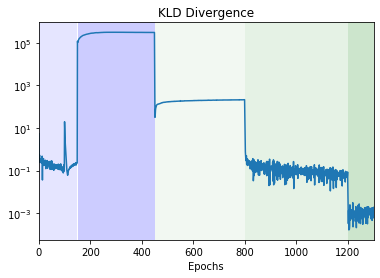

In [93]:
plt.plot(kld)
plt.yscale('log')
plt.xlabel('Epochs')
plt.title('KLD Divergence')

# Settings 
plt.xlim(xmin=0, xmax = 1300)
plt.axvspan(0, 150, facecolor='b', alpha=0.1)
plt.axvspan(151, 450, facecolor='b', alpha=0.2)
plt.axvspan(451, 800, facecolor='g', alpha=0.05)
plt.axvspan(800, 1200, facecolor='g', alpha=0.1)
plt.axvspan(1200, 1300, facecolor='g', alpha=0.2)

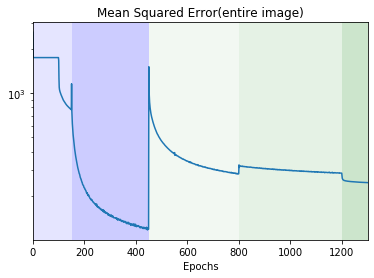

In [92]:
plt.plot(mse)
plt.yscale('log')
plt.xlabel('Epochs')
plt.title('Mean Squared Error(entire image)')

# Settings 
plt.xlim(xmin=0, xmax = 1300)
plt.axvspan(0, 150, facecolor='b', alpha=0.1)
plt.axvspan(151, 450, facecolor='b', alpha=0.2)
plt.axvspan(451, 800, facecolor='g', alpha=0.05)
plt.axvspan(800, 1200, facecolor='g', alpha=0.1)
plt.axvspan(1200, 1300, facecolor='g', alpha=0.2)